#Sleep data analysis

For 4 weeks commencing on 26/10/2023, I (a 44 year old male) started a nonblinded randomised controlled crossover trial to determine the effects of the following interventions on sleep quality (Likert scale 1-5), sleep duration (hours), sleep onset latency (minutes), and wakefullness after sleep onset (Likert scale 1-5):
- 1 week of daily pre-bed melatonin (0.5 mg oral, 30 mins before bed),
- 1 week of daily pre-bed binaural beats (10 minutes, 30 mins before bed),
- 1 week of pre-bed melatonin combined with binaural beats, versus
- 1 week of no daily treatment (control).

To help understand the factors that might influence my sleep quality and quantity, I also measured several variables including my food, caffeine, alcohol, and chocolate intake, the timing of pre-bed food/caffeine/alcohol/chocolate intake, caffeine, pre-bed phone use, daily exercise (duration, intensity, load), exposure to sunlight, work stress, life stress, illness, and bed time.

## Import packages

In [142]:
import numpy as np #data analysis
import pandas as pd #data analysis
import scipy #statistical analysis
from scipy import constants
import scipy.stats as stats
import statsmodels #statistical analysis
import matplotlib #dataviz
import matplotlib.pyplot as plt
import seaborn as sns #dataviz
import sklearn #machine learning
import tensorflow #machine learning

## Load data

In [143]:
import pandas
df = pandas.read_csv("/content/drive/MyDrive/ACADEMIA/COURSES & PROFESSIONAL DEVELOPMENT (PDR)/DATA SCIENCE PROJECTS/20231201_sleep_data.csv")

## View the dataframe

In [144]:
df.head()

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
0,1,3.5,1,1,2,1.0,1,2,13.0,1,...,1,0,0,1,1410.0,60,7.0,4,1,Binaural Beats
1,2,5.0,0,1,2,2.0,1,1,14.0,1,...,1,0,0,1,1410.0,30,6.5,1,2,Binaural Beats
2,3,6.0,1,1,4,1.5,1,1,15.0,0,...,2,0,0,1,1530.0,15,7.0,2,2,Binaural Beats
3,4,3.0,0,1,2,6.0,1,2,9.0,0,...,1,0,0,1,1410.0,15,7.0,0,3,Binaural Beats
4,5,3.5,1,0,0,NaN,1,1,15.0,0,...,1,0,0,1,1410.0,15,7.0,0,3,Binaural Beats


Inspect the DataFrame

In [145]:
# Print the head of the sleep data
print(df.head())
# Print information about sleep data
print(df.info())
# Print the shape of sleep data
print(df.shape)
# Print a description of sleep data
print(df.describe())

   Day   Dinner_time_before_bed  Post_dinner_snacks  Alcohol  Alcohol_units  \
0     1                     3.5                   1        1              2   
1     2                     5.0                   0        1              2   
2     3                     6.0                   1        1              4   
3     4                     3.0                   0        1              2   
4     5                     3.5                   1        0              0   

   Alcohol_time_before_bed  Caffeinated_drinks  Caffeinated_drink_units  \
0                      1.0                   1                        2   
1                      2.0                   1                        1   
2                      1.5                   1                        1   
3                      6.0                   1                        2   
4                      NaN                   1                        1   

   Caffeinated_drinks_time_before_bed  Chocolate  ...  Life_stress  Illnes

## Replace NaN with zero
The NaN values (missing values) should NOT be dropped but set as zero using fill_value=0.

In [146]:
df.fillna(0)

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group
0,1,3.50,1,1,2,1.00,1,2,13.0,1,...,1,0,0,1,1410.0,60,7.00,4,1,Binaural Beats
1,2,5.00,0,1,2,2.00,1,1,14.0,1,...,1,0,0,1,1410.0,30,6.50,1,2,Binaural Beats
2,3,6.00,1,1,4,1.50,1,1,15.0,0,...,2,0,0,1,1530.0,15,7.00,2,2,Binaural Beats
3,4,3.00,0,1,2,6.00,1,2,9.0,0,...,1,0,0,1,1410.0,15,7.00,0,3,Binaural Beats
4,5,3.50,1,0,0,0.00,1,1,15.0,0,...,1,0,0,1,1410.0,15,7.00,0,3,Binaural Beats
5,6,3.00,1,0,0,0.00,1,1,14.0,1,...,1,0,0,1,1410.0,15,6.50,2,1,Binaural Beats
6,7,4.00,1,0,0,0.00,1,2,7.5,0,...,1,1,0,1,1350.0,45,7.50,1,2,Binaural Beats
7,8,3.50,1,0,0,0.00,1,1,13.5,1,...,2,0,1,1,1410.0,15,6.50,0,2,Melotonin + Binaural Beats
8,9,2.75,0,0,0,0.00,1,1,14.0,1,...,1,0,1,1,1410.0,15,7.50,0,3,Melotonin + Binaural Beats
9,10,3.00,0,0,0,0.00,1,1,13.5,1,...,1,0,1,1,1410.0,15,7.75,0,3,Melotonin + Binaural Beats


Inspect the updated data frame

In [147]:
# Print the head of the sleep data
print(df.head())
# Print information about sleep data
print(df.info())
# Print the shape of sleep data
print(df.shape)
# Print a description of sleep data
print(df.describe())

   Day   Dinner_time_before_bed  Post_dinner_snacks  Alcohol  Alcohol_units  \
0     1                     3.5                   1        1              2   
1     2                     5.0                   0        1              2   
2     3                     6.0                   1        1              4   
3     4                     3.0                   0        1              2   
4     5                     3.5                   1        0              0   

   Alcohol_time_before_bed  Caffeinated_drinks  Caffeinated_drink_units  \
0                      1.0                   1                        2   
1                      2.0                   1                        1   
2                      1.5                   1                        1   
3                      6.0                   1                        2   
4                      NaN                   1                        1   

   Caffeinated_drinks_time_before_bed  Chocolate  ...  Life_stress  Illnes

## Data viz

### Sleep quality
View bar plots of the sleep quality data

<ipython-input-148-7585ea86959b>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


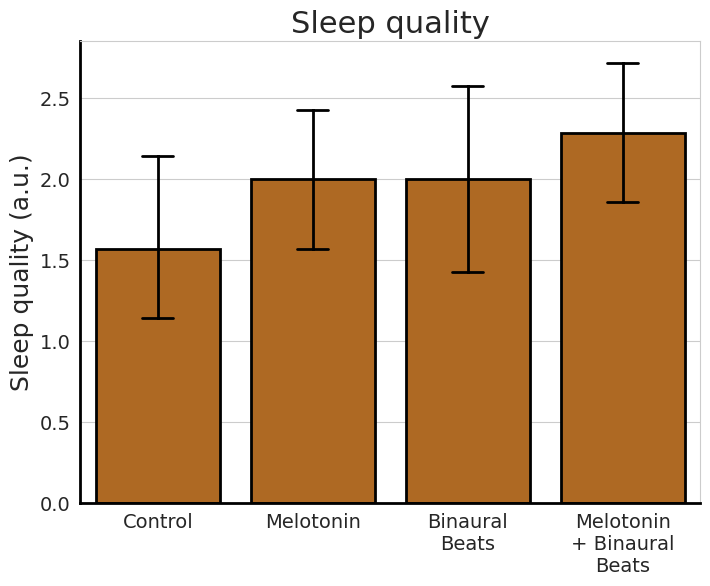

In [148]:
group_order = ["Control",
                  "Melotonin",
                  "Binaural Beats",
                  "Melotonin + Binaural Beats"]
# Set the color palette
sns.set_style("whitegrid")
sns.set_palette("PuOr")
# build a barplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df,x='Group',y='Sleep_quality',
            order=group_order, edgecolor='black', linewidth=2,
            # set error bar style
            errorbar=("ci", 95), capsize=0.2, err_kws={"color": "black", "linewidth": 2})
ax.set_title("Sleep quality", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Sleep quality (a.u.)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
plt.xticks(rotation=45)
# wrap axes label
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.show()

### Sleep duration
View bar plots of the sleep duration data

<ipython-input-149-69455048a35b>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


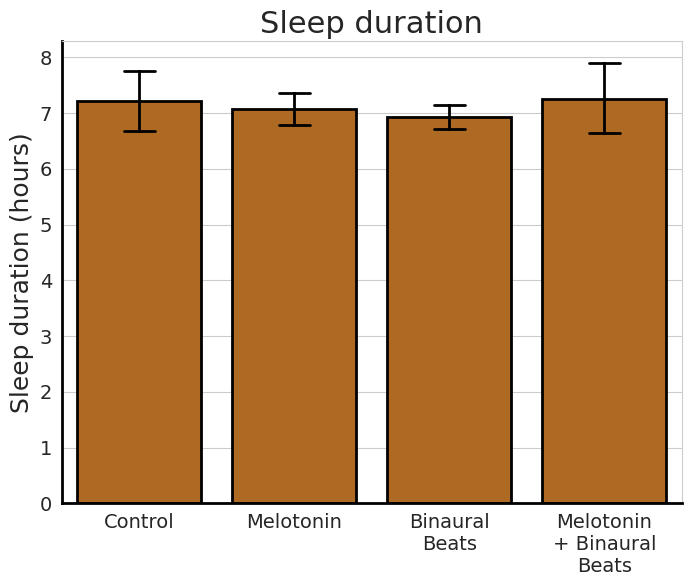

In [149]:
group_order = ["Control",
                  "Melotonin",
                  "Binaural Beats",
                  "Melotonin + Binaural Beats"]
# Set the color palette
sns.set_style("whitegrid")
sns.set_palette("PuOr")
# build a barplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(data=df, x='Group', y='Total_sleep_time',
            order=group_order, edgecolor='black', linewidth=2,
            # set error bar style
            errorbar=("ci", 95), capsize=0.2,
            err_kws={"color": "black", "linewidth": 2})
ax.set_title("Sleep duration", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Sleep duration (hours)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
plt.xticks(rotation=45)
#wrap axes label
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.show()

### Sleep onset latency
View bar plots of the sleep onset latency data

<ipython-input-150-5ba3fbc71307>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


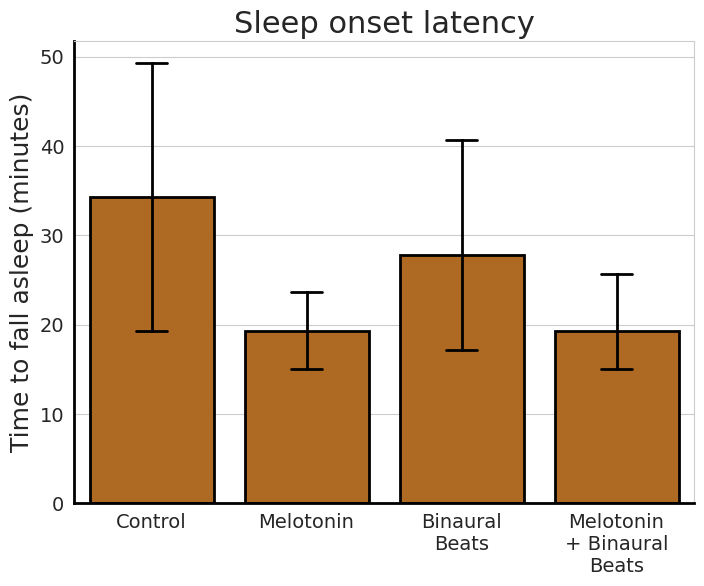

In [150]:
group_order = ["Control",
                  "Melotonin",
                  "Binaural Beats",
                  "Melotonin + Binaural Beats"]
# Set the color palette
sns.set_style("whitegrid")
sns.set_palette("PuOr")
# build a barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='Group', y='Sleep_onset_latency',
            order=group_order, edgecolor='black', linewidth=2,
            # set error bar style
            errorbar=("ci", 95), capsize=0.2,
            err_kws={"color": "black", "linewidth": 2})
ax.set_title("Sleep onset latency", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Time to fall asleep (minutes)", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
plt.xticks(rotation=45)
#wrap axes label
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.show()

### Wakefullness
View bar plots of the wakefullness data

<ipython-input-151-057d2c8b7750>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=0)


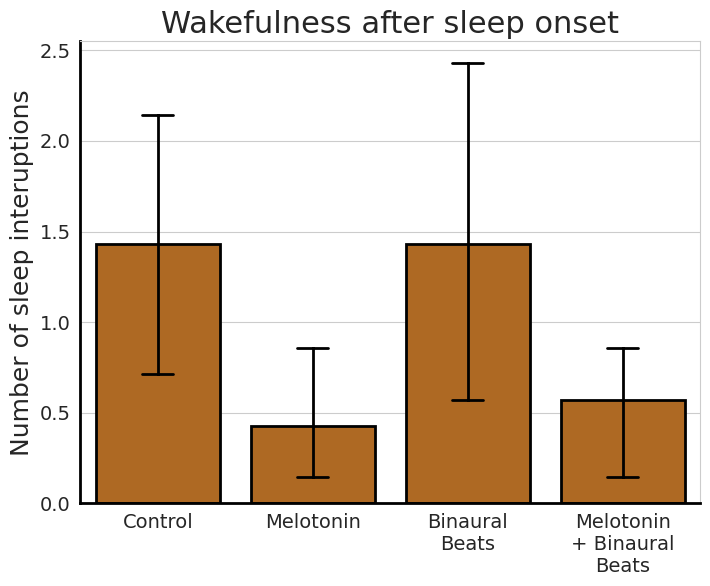

In [151]:
group_order = ["Control",
                  "Melotonin",
                  "Binaural Beats",
                  "Melotonin + Binaural Beats"]
# Set the color palette
sns.set_style("whitegrid")
sns.set_palette("PuOr")
# build a barplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='Group', y='Wakefulness_after_sleep_onset',
            order=group_order, edgecolor='black', linewidth=2,
            # set error bar style
            errorbar=("ci", 95), capsize=0.2,
            err_kws={"color": "black", "linewidth": 2})
ax.set_title("Wakefulness after sleep onset", fontsize=22)
ax.set_xlabel("", fontsize=18)
ax.set_ylabel("Number of sleep interuptions", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
plt.xticks(rotation=45)
#wrap axes label
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
wrap_labels(ax, 10)
ax.figure
plt.show()

# Statistical analyses

## Sleep quality
### Check Sleep quality data for normality and heteroscedasticity

#### Normality
Shapiro-Wilk Test: Good for small to moderate sample sizes. <br>
Kolmogorov-Smirnov Test: Compares the sample distribution to a normal distribution. <br>
Q-Q Plot: A visual method to assess normality.

In [152]:
# Import packages
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Sleep_quality'])

print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Shapiro-Wilk Test Statistic: 0.8126332924003773
P-value: 0.0001797528348908465
Data does not look normally distributed (reject H0)


In [153]:
from scipy.stats import kstest, norm

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(df['Sleep_quality'], 'norm', args=(df['Sleep_quality'].mean(), df['Sleep_quality'].std()))

print(f'Kolmogorov-Smirnov Test Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

Kolmogorov-Smirnov Test Statistic: 0.23341678890173978
P-value: 0.07976287546289973
Data looks normally distributed (fail to reject H0)


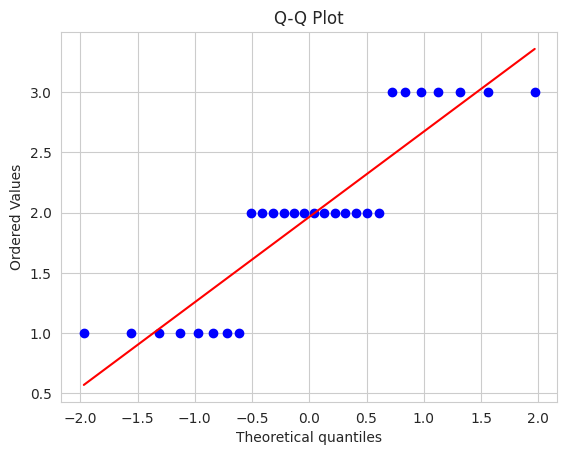

In [154]:
# Q-Q plot
stats.probplot(df['Sleep_quality'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### Heteroscedasticity
Breusch-Pagan Test: Tests for heteroscedasticity in regression models. <br>
Levene’s Test: Tests for equal variances across groups.

In [155]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols

# Fit a linear model
model = ols('Sleep_quality ~ C(Group)', data=df).fit()

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

print('Breusch-Pagan Test Statistic:', bp_test[0])
print('P-value:', bp_test[1])

# Interpret the result
if bp_test[1] > 0.05:
    print('Homoscedasticity (fail to reject H0)')
else:
    print('Heteroscedasticity (reject H0)')

Breusch-Pagan Test Statistic: 1.18023255813954
P-value: 0.7577491597863331
Homoscedasticity (fail to reject H0)


In [156]:
from scipy.stats import levene

# Perform Levene’s test
group1 = df[df['Group'] == 'Control']['Sleep_quality']
group2 = df[df['Group'] == 'Melotonin']['Sleep_quality']
group3 = df[df['Group'] == 'Binaural Beats']['Sleep_quality']
group4 = df[df['Group'] == 'Melotonin + Binaural Beats']['Sleep_quality']

stat, p_value = levene(group1, group2, group3, group4)

print(f'Levene’s Test Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpret the result
if p_value > 0.05:
    print('Equal variances (fail to reject H0)')
else:
    print('Unequal variances (reject H0)')

Levene’s Test Statistic: 0.4
P-value: 0.7542409298634625
Equal variances (fail to reject H0)


Because the sleep quality data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the sleep quality data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [157]:
# Define the maximum score for the psychometric scale
max_score = 3

# Transform Sleep_quality to a percentage of the max score
df['Sleep_quality_transform'] = (df['Sleep_quality'] / max_score) * 100

# View the updated DataFrame
df.head()

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_transform
0,1,3.5,1,1,2,1.0,1,2,13.0,1,...,0,0,1,1410.0,60,7.0,4,1,Binaural Beats,33.333333
1,2,5.0,0,1,2,2.0,1,1,14.0,1,...,0,0,1,1410.0,30,6.5,1,2,Binaural Beats,66.666667
2,3,6.0,1,1,4,1.5,1,1,15.0,0,...,0,0,1,1530.0,15,7.0,2,2,Binaural Beats,66.666667
3,4,3.0,0,1,2,6.0,1,2,9.0,0,...,0,0,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000
4,5,3.5,1,0,0,NaN,1,1,15.0,0,...,0,0,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000


### One-way ANOVA on sleep quality.

In [158]:
# Import packages
import statsmodels.formula.api as smf

# Fit the model using ordinary least squares (OLS)
model = smf.ols('Sleep_quality_transform ~ C(Group)', data=df).fit()

# Perform the ANOVA
anova_table_SleepQuality = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table_SleepQuality)

                sum_sq    df         F    PR(>F)
C(Group)   2023.809524   3.0  1.108696  0.364987
Residual  14603.174603  24.0       NaN       NaN


In [159]:
# Import packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukeySleepQuality = pairwise_tukeyhsd(endog=df['Sleep_quality_transform'], groups=df['Group'], alpha=0.05)

# Display the results
print(tukeySleepQuality)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
    group1               group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
Binaural Beats                    Control -14.2857 0.7027 -50.6583 22.0869  False
Binaural Beats                  Melotonin      0.0    1.0 -36.3726 36.3726  False
Binaural Beats Melotonin + Binaural Beats   9.5238 0.8872 -26.8488 45.8964  False
       Control                  Melotonin  14.2857 0.7027 -22.0869 50.6583  False
       Control Melotonin + Binaural Beats  23.8095 0.2952 -12.5631 60.1821  False
     Melotonin Melotonin + Binaural Beats   9.5238 0.8872 -26.8488 45.8964  False
---------------------------------------------------------------------------------


## Sleep duration

### Normality

Shapiro-Wilk Test Statistic: 0.9510767275331424
P-value: 0.21084263260860353
Data looks normally distributed (fail to reject H0)
Kolmogorov-Smirnov Test Statistic: 0.15084648296761854
P-value: 0.4998132890006034
Data looks normally distributed (fail to reject H0)


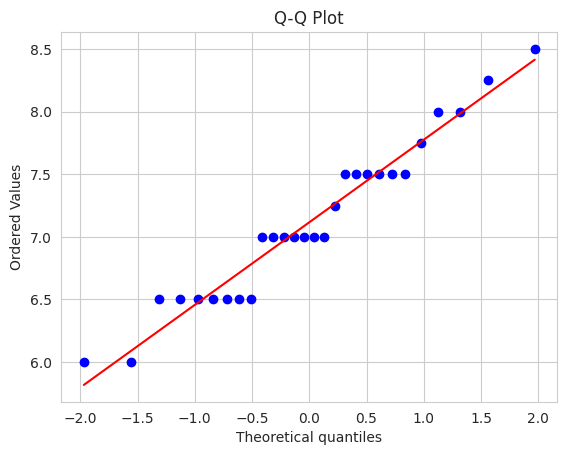

In [160]:
# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Total_sleep_time'])
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(df['Total_sleep_time'], 'norm', args=(df['Total_sleep_time'].mean(), df['Total_sleep_time'].std()))
print(f'Kolmogorov-Smirnov Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Q-Q plot
stats.probplot(df['Total_sleep_time'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### Heteroscedasticity

In [161]:
# Fit a linear model
model = ols('Total_sleep_time ~ C(Group)', data=df).fit()
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test Statistic:', bp_test[0])
print('P-value:', bp_test[1])
# Interpret the result
if bp_test[1] > 0.05:
    print('Homoscedasticity (fail to reject H0)')
else:
    print('Heteroscedasticity (reject H0)')


# Perform Levene’s test
group1 = df[df['Group'] == 'Control']['Total_sleep_time']
group2 = df[df['Group'] == 'Melotonin']['Total_sleep_time']
group3 = df[df['Group'] == 'Binaural Beats']['Total_sleep_time']
group4 = df[df['Group'] == 'Melotonin + Binaural Beats']['Total_sleep_time']
stat, p_value = levene(group1, group2, group3, group4)
print(f'Levene’s Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Equal variances (fail to reject H0)')
else:
    print('Unequal variances (reject H0)')

Breusch-Pagan Test Statistic: 8.613502747049344
P-value: 0.03489640799372006
Heteroscedasticity (reject H0)
Levene’s Test Statistic: 2.6862745098039214
P-value: 0.06916790520030192
Equal variances (fail to reject H0)


### One-way ANOVA on sleep duration.

In [162]:
# Fit the model using ordinary least squares (OLS)
model = smf.ols('Total_sleep_time ~ C(Group)', data=df).fit()

# Perform the ANOVA
anova_table_SleepDuration = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table_SleepDuration)

             sum_sq    df         F    PR(>F)
C(Group)   0.453125   3.0  0.333882  0.800929
Residual  10.857143  24.0       NaN       NaN


In [163]:
# Perform Tukey's HSD test
tukeySleepDuration = pairwise_tukeyhsd(endog=df['Total_sleep_time'], groups=df['Group'], alpha=0.05)

# Display the results
print(tukeySleepDuration)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1               group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------
Binaural Beats                    Control   0.2857 0.8561  -0.706 1.2775  False
Binaural Beats                  Melotonin   0.1429 0.9783 -0.8489 1.1346  False
Binaural Beats Melotonin + Binaural Beats   0.3214  0.808 -0.6703 1.3132  False
       Control                  Melotonin  -0.1429 0.9783 -1.1346 0.8489  False
       Control Melotonin + Binaural Beats   0.0357 0.9996  -0.956 1.0275  False
     Melotonin Melotonin + Binaural Beats   0.1786  0.959 -0.8132 1.1703  False
-------------------------------------------------------------------------------


## Sleep onset latency

### Normality

Shapiro-Wilk Test Statistic: 0.6908091791487001
P-value: 2.1184193918639546e-06
Data does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic: 0.35414084988772065
P-value: 0.0012008175583831937
Data does not look normally distributed (reject H0)


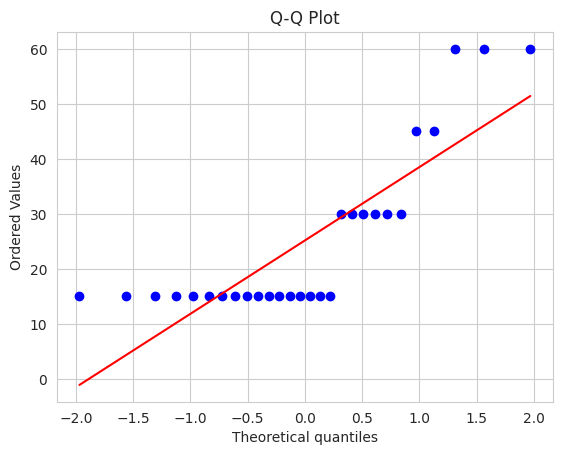

In [164]:
# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Sleep_onset_latency'])
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(df['Sleep_onset_latency'], 'norm', args=(df['Sleep_onset_latency'].mean(), df['Sleep_onset_latency'].std()))
print(f'Kolmogorov-Smirnov Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Q-Q plot
stats.probplot(df['Sleep_onset_latency'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### Heteroscedasticity

In [165]:
# Fit a linear model
model = ols('Sleep_onset_latency ~ C(Group)', data=df).fit()
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test Statistic:', bp_test[0])
print('P-value:', bp_test[1])
# Interpret the result
if bp_test[1] > 0.05:
    print('Homoscedasticity (fail to reject H0)')
else:
    print('Heteroscedasticity (reject H0)')


# Perform Levene’s test
group1 = df[df['Group'] == 'Control']['Sleep_onset_latency']
group2 = df[df['Group'] == 'Melotonin']['Sleep_onset_latency']
group3 = df[df['Group'] == 'Binaural Beats']['Sleep_onset_latency']
group4 = df[df['Group'] == 'Melotonin + Binaural Beats']['Sleep_onset_latency']
stat, p_value = levene(group1, group2, group3, group4)
print(f'Levene’s Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Equal variances (fail to reject H0)')
else:
    print('Unequal variances (reject H0)')

Breusch-Pagan Test Statistic: 9.703168228469439
P-value: 0.02126538284291834
Heteroscedasticity (reject H0)
Levene’s Test Statistic: 2.117647058823529
P-value: 0.12446628512845073
Equal variances (fail to reject H0)


Because the sleep onset latency data is not normally distributed, need to transform the data.

### Transform the sleep onset latency data
For continuous data, it is most appropriate to log transform. But, first need to check that there are no non-positive numbers because you cannot log transform zero or negative numbers.

In [166]:
# Check for non-positive values
if (df['Sleep_quality'] <= 0).any():
    raise ValueError("Log transformation cannot be applied to non-positive values.")

# Apply the natural log transformation
df['Sleep_onset_latency_transform'] = np.log(df['Sleep_onset_latency'])

# View the updated DataFrame
df.head()

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_transform,Sleep_onset_latency_transform
0,1,3.5,1,1,2,1.0,1,2,13.0,1,...,0,1,1410.0,60,7.0,4,1,Binaural Beats,33.333333,4.094345
1,2,5.0,0,1,2,2.0,1,1,14.0,1,...,0,1,1410.0,30,6.5,1,2,Binaural Beats,66.666667,3.401197
2,3,6.0,1,1,4,1.5,1,1,15.0,0,...,0,1,1530.0,15,7.0,2,2,Binaural Beats,66.666667,2.708050
3,4,3.0,0,1,2,6.0,1,2,9.0,0,...,0,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050
4,5,3.5,1,0,0,NaN,1,1,15.0,0,...,0,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050


### One-way ANOVA on sleep onset latency.

In [167]:
# Fit the model using ordinary least squares (OLS)
model = smf.ols('Sleep_onset_latency_transform ~ C(Group)', data=df).fit()

# Perform the ANOVA
anova_table_SleepOnsetLatency = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table_SleepOnsetLatency)

            sum_sq    df         F    PR(>F)
C(Group)  1.019381   3.0  1.338227  0.285376
Residual  6.093920  24.0       NaN       NaN


In [168]:
# Perform Tukey's HSD test
tukeySleepLatency = pairwise_tukeyhsd(endog=df['Sleep_onset_latency_transform'], groups=df['Group'], alpha=0.05)

# Display the results
print(tukeySleepLatency)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
    group1               group2           meandiff p-adj  lower  upper  reject
------------------------------------------------------------------------------
Binaural Beats                    Control    0.198 0.8819 -0.545 0.9411  False
Binaural Beats                  Melotonin   -0.256 0.7783 -0.999 0.4871  False
Binaural Beats Melotonin + Binaural Beats   -0.256 0.7783 -0.999 0.4871  False
       Control                  Melotonin   -0.454 0.3528 -1.197  0.289  False
       Control Melotonin + Binaural Beats   -0.454 0.3528 -1.197  0.289  False
     Melotonin Melotonin + Binaural Beats      0.0    1.0 -0.743  0.743  False
------------------------------------------------------------------------------


## Wakefullness

### Normality

Shapiro-Wilk Test Statistic: 0.8220076936704793
P-value: 0.0002676125117110036
Data does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic: 0.23624639812580428
P-value: 0.07380212778152317
Data looks normally distributed (fail to reject H0)


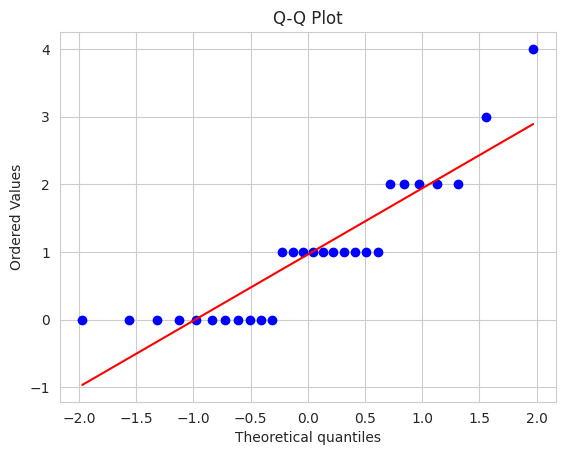

In [169]:
# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df['Wakefulness_after_sleep_onset'])
print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Perform Kolmogorov-Smirnov test for normality
stat, p_value = kstest(df['Wakefulness_after_sleep_onset'], 'norm', args=(df['Wakefulness_after_sleep_onset'].mean(), df['Wakefulness_after_sleep_onset'].std()))
print(f'Kolmogorov-Smirnov Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Data looks normally distributed (fail to reject H0)')
else:
    print('Data does not look normally distributed (reject H0)')

# Q-Q plot
stats.probplot(df['Wakefulness_after_sleep_onset'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

### Heteroscedasticity

In [170]:
# Fit a linear model
model = ols('Wakefulness_after_sleep_onset ~ C(Group)', data=df).fit()
# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test Statistic:', bp_test[0])
print('P-value:', bp_test[1])
# Interpret the result
if bp_test[1] > 0.05:
    print('Homoscedasticity (fail to reject H0)')
else:
    print('Heteroscedasticity (reject H0)')


# Perform Levene’s test
group1 = df[df['Group'] == 'Control']['Wakefulness_after_sleep_onset']
group2 = df[df['Group'] == 'Melotonin']['Wakefulness_after_sleep_onset']
group3 = df[df['Group'] == 'Binaural Beats']['Wakefulness_after_sleep_onset']
group4 = df[df['Group'] == 'Melotonin + Binaural Beats']['Wakefulness_after_sleep_onset']
stat, p_value = levene(group1, group2, group3, group4)
print(f'Levene’s Test Statistic: {stat}')
print(f'P-value: {p_value}')
# Interpret the result
if p_value > 0.05:
    print('Equal variances (fail to reject H0)')
else:
    print('Unequal variances (reject H0)')

Breusch-Pagan Test Statistic: 5.834160170092135
P-value: 0.11996344325183451
Homoscedasticity (fail to reject H0)
Levene’s Test Statistic: 1.0200000000000005
P-value: 0.4012128413711485
Equal variances (fail to reject H0)


Because the wakefullness data is psychometric and because it is not normally distributed, need to transform the data.

### Transform the wakefullness data
For psychometric data, it is most appropriate to transform to a percent of maximum value.

In [171]:
# Define the maximum score for the psychometric scale
max_score = 4

# Transform Sleep_quality to a percentage of the max score
df['Wakefulness_after_sleep_onset_transform'] = (df['Wakefulness_after_sleep_onset'] / max_score) * 100

# View the updated DataFrame
df.head()

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_transform,Sleep_onset_latency_transform,Wakefulness_after_sleep_onset_transform
0,1,3.5,1,1,2,1.0,1,2,13.0,1,...,1,1410.0,60,7.0,4,1,Binaural Beats,33.333333,4.094345,100.0
1,2,5.0,0,1,2,2.0,1,1,14.0,1,...,1,1410.0,30,6.5,1,2,Binaural Beats,66.666667,3.401197,25.0
2,3,6.0,1,1,4,1.5,1,1,15.0,0,...,1,1530.0,15,7.0,2,2,Binaural Beats,66.666667,2.708050,50.0
3,4,3.0,0,1,2,6.0,1,2,9.0,0,...,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050,0.0
4,5,3.5,1,0,0,NaN,1,1,15.0,0,...,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050,0.0


### One-way ANOVA on wakefullness.

In [172]:
# Fit the model using ordinary least squares (OLS)
model = smf.ols('Wakefulness_after_sleep_onset_transform ~ C(Group)', data=df).fit()

# Perform the ANOVA
anova_table_Wakefullness = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table_Wakefullness)

                sum_sq    df       F    PR(>F)
C(Group)   3816.964286   3.0  2.1375  0.121902
Residual  14285.714286  24.0     NaN       NaN


In [173]:
# Perform Tukey's HSD test
tukeyWakefullness = pairwise_tukeyhsd(endog=df['Wakefulness_after_sleep_onset_transform'], groups=df['Group'], alpha=0.05)

# Display the results
print(tukeyWakefullness)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
    group1               group2           meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------
Binaural Beats                    Control      0.0    1.0 -35.9751 35.9751  False
Binaural Beats                  Melotonin    -25.0 0.2477 -60.9751 10.9751  False
Binaural Beats Melotonin + Binaural Beats -21.4286 0.3746 -57.4036 14.5465  False
       Control                  Melotonin    -25.0 0.2477 -60.9751 10.9751  False
       Control Melotonin + Binaural Beats -21.4286 0.3746 -57.4036 14.5465  False
     Melotonin Melotonin + Binaural Beats   3.5714 0.9926 -32.4036 39.5465  False
---------------------------------------------------------------------------------


## Interpretation of ANOVA results
One-way ANOVA found that the null hypothesis was not rejected (P>0.05) for any of the 4 variables (sleep duration, sleep quality, sleep latency onset, or wakefullness), i.e., the between-group differences were not statistically significant at the 5% level. Therefore, I conclude that neither pre-bed melatonin nor pre-bed binaural beats alterned by sleep duration or quality when tested for 7 days each.

##Effect sizes for the between group comparisons
To further interpret the data, I also calculated Cohen's d, a measure of effect size used to indicate the standardized difference between two means.
<br><br>
Effect sizes were interpreted to infer trivial (d<0.20), small (0.20≤d<0.50), moderate (0.50≤d<0.80), or large effects (d≥0.80).

### Sleep quality

In [174]:
# Manually calculate Cohen's d effect size
# Extract data for the groups to compare
ControlgroupSleepQuality = df[df['Group'] == 'Control']['Sleep_quality_transform']
MelotoningroupSleepQuality = df[df['Group'] == 'Melotonin']['Sleep_quality_transform']
BinauralBeatsgroupSleepQuality = df[df['Group'] == 'Binaural Beats']['Sleep_quality_transform']
CombinedgroupSleepQuality = df[df['Group'] == 'Melotonin + Binaural Beats']['Sleep_quality_transform']

# Calculate means, standard deviations, and sample sizes for all groups
mean1 = ControlgroupSleepQuality.mean()
mean2 = MelotoningroupSleepQuality.mean()
mean3 = BinauralBeatsgroupSleepQuality.mean()
mean4 = CombinedgroupSleepQuality.mean()
std1 = ControlgroupSleepQuality.std()
std2 = MelotoningroupSleepQuality.std()
std3 = BinauralBeatsgroupSleepQuality.std()
std4 = CombinedgroupSleepQuality.std()
n1 = ControlgroupSleepQuality.count()
n2 = MelotoningroupSleepQuality.count()
n3 = BinauralBeatsgroupSleepQuality.count()
n4 = CombinedgroupSleepQuality.count()

# Calculate pooled standard deviation across all groups
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2 + (n3 - 1) * std3**2 + (n4 -1) * std4**2) / (n1 + n2 + n3 + n4 - 4))

# Calculate Cohen's d
# for Melotonin vs. Control
cohens_d_MelotoninVsControl = (MelotoningroupSleepQuality.mean() - ControlgroupSleepQuality.mean()) / pooled_std
# for Binaural beats vs. Control
cohens_d_BiBeatsVsControl = (BinauralBeatsgroupSleepQuality.mean() - ControlgroupSleepQuality.mean()) / pooled_std
# for Melotonin + Binaural beats vs. Control
cohens_d_CombinedVsControl = (CombinedgroupSleepQuality.mean() - ControlgroupSleepQuality.mean()) / pooled_std

# Calculate the standard error of Cohen's d
# for Melotonin vs. Control
se_d_MelotoninVsControl = np.sqrt((MelotoningroupSleepQuality.count() + ControlgroupSleepQuality.count()) / (MelotoningroupSleepQuality.count() * ControlgroupSleepQuality.count()) + (cohens_d_MelotoninVsControl**2 / (2 * (MelotoningroupSleepQuality.count() + ControlgroupSleepQuality.count()))))
# for Binaural beats vs. Control
se_d_BiBeatsVsControl = np.sqrt((BinauralBeatsgroupSleepQuality.count() + ControlgroupSleepQuality.count()) / (BinauralBeatsgroupSleepQuality.count() * ControlgroupSleepQuality.count()) + (cohens_d_BiBeatsVsControl**2 / (2 * (BinauralBeatsgroupSleepQuality.count() + ControlgroupSleepQuality.count()))))
# for Melotonin + Binaural beats vs. Control
se_d_CombinedVsControl = np.sqrt((CombinedgroupSleepQuality.count() + ControlgroupSleepQuality.count()) / (CombinedgroupSleepQuality.count() * ControlgroupSleepQuality.count()) + (cohens_d_CombinedVsControl**2 / (2 * (CombinedgroupSleepQuality.count() + ControlgroupSleepQuality.count()))))

# Z-value for 95% confidence interval
z_value = 1.96

# Calculate 95% confidence interval
# for Melotonin vs. Control
ci_MelotoninVsControl_lower = cohens_d_MelotoninVsControl - z_value * se_d_MelotoninVsControl
ci_MelotoninVsControl_upper = cohens_d_MelotoninVsControl + z_value * se_d_MelotoninVsControl
# for Binaural beats vs. Control
ci_BiBeatsVsControl_lower = cohens_d_BiBeatsVsControl - z_value * se_d_BiBeatsVsControl
ci_BiBeatsVsControl_upper = cohens_d_BiBeatsVsControl + z_value * se_d_BiBeatsVsControl
# for Melotonin + Binaural beats vs. Control
ci_CombinedVsControl_lower = cohens_d_CombinedVsControl - z_value * se_d_CombinedVsControl
ci_CombinedVsControl_upper = cohens_d_CombinedVsControl + z_value * se_d_CombinedVsControl

print(f"Sleep quality (Cohen's d effect size):")
print(f" - Melotonin vs. Control, d = {cohens_d_MelotoninVsControl:.3f} (95% CI: {ci_MelotoninVsControl_lower:.3f} to {ci_MelotoninVsControl_upper:.3f})")
print(f" - Binaural beats vs. Control, d = {cohens_d_BiBeatsVsControl:.3f} (95% CI: {ci_BiBeatsVsControl_lower:.3f} to {ci_BiBeatsVsControl_upper:.3f})")
print(f" - Melotonin & Binaural beats vs. Control, d = {cohens_d_CombinedVsControl:.3f} (95% CI: {ci_CombinedVsControl_lower:.3f} to {ci_CombinedVsControl_upper:.3f})")
print(f"Interpret effect sizes to infer: trivial (d<0.20), small (0.20≤d<0.50), moderate (0.50≤d<0.80), or large effects (d≥0.80).")

Sleep quality (Cohen's d effect size):
 - Melotonin vs. Control, d = 0.579 (95% CI: -0.490 to 1.649)
 - Binaural beats vs. Control, d = 0.579 (95% CI: -0.490 to 1.649)
 - Melotonin & Binaural beats vs. Control, d = 0.965 (95% CI: -0.142 to 2.072)
Interpret effect sizes to infer: trivial (d<0.20), small (0.20≤d<0.50), moderate (0.50≤d<0.80), or large effects (d≥0.80).


In [175]:
# Or calculate effect sizes and 95% CI automatically by running the one-way ANOVA using the Pingouin package
# Import packages https://pingouin-stats.org/build/html/api.html#effect-sizes
!pip install pingouin
import pingouin as pg

In [176]:
# Run one-way ANOVA in Pingouin
SleepQuality_anova = pg.anova(dv='Sleep_quality_transform', between='Group', data=df, detailed=True)
print("ANOVA Results:")
print(SleepQuality_anova)

# Run post-hoc pairwise comparisons with Cohen's d effect sizes
SleepQuality_posthoc = pg.pairwise_tukey(data=df, dv='Sleep_quality_transform', between='Group')
print("\nPost-hoc Tukey HSD Test Results:")
print(SleepQuality_posthoc)

# Calculate Cohen's d for each pair of groups
SleepQuality_pairwise_effsize = pg.pairwise_tests(data=df, dv='Sleep_quality_transform', between='Group', effsize='cohen')
print("\nPairwise Cohen's d Effect Sizes:")
print(SleepQuality_pairwise_effsize)

# Calculate 95% confidence intervals for Cohen's d using pinguoin compute_esci function
SleepQuality_cohens_d = SleepQuality_pairwise_effsize['cohen']
SleepQuality_CI95 = pg.compute_esci(stat=SleepQuality_cohens_d, eftype='cohen', nx=n1, ny=n2, confidence=.95)
print("\n95% confidence intervals for the Pairwise Cohen's d Effect Sizes:")
print(SleepQuality_CI95)
print("NOTE: The output from compute_esci is a 2D Array (i.e. a list of lists)")

# Transpose the 2D Array (list of lists) to make inner lists columns instead of rows
SleepQuality_transposed_array = list(zip(*SleepQuality_CI95))
# Create new DataFrame columns of the 95%CI values, where each list in transposed_array becomes a column
SleepQuality_CI95_columns = pd.DataFrame(SleepQuality_transposed_array, columns=['95% CI lower', '95% CI upper'])
# Add the new columns to the pairwise_effsize dataframe
SleepQuality_EffectsPlusCI95 = pd.concat([SleepQuality_pairwise_effsize, SleepQuality_CI95_columns], axis=1)
# Extract and print the effect size and 95%CI columns only
SleepQuality_CohensDCI95Data = SleepQuality_EffectsPlusCI95[['A', 'B', 'cohen', '95% CI lower', '95% CI upper']]
print("\nPairwise Cohen's d Effect Sizes and 95% confidence intervals:")
print(SleepQuality_CohensDCI95Data)

ANOVA Results:
   Source            SS  DF          MS         F     p-unc       np2
0   Group   2023.809524   3  674.603175  1.108696  0.364987  0.121718
1  Within  14603.174603  24  608.465608       NaN       NaN       NaN

Post-hoc Tukey HSD Test Results:
                A                           B    mean(A)    mean(B)  \
0  Binaural Beats                     Control  66.666667  52.380952   
1  Binaural Beats                   Melotonin  66.666667  66.666667   
2  Binaural Beats  Melotonin + Binaural Beats  66.666667  76.190476   
3         Control                   Melotonin  52.380952  66.666667   
4         Control  Melotonin + Binaural Beats  52.380952  76.190476   
5       Melotonin  Melotonin + Binaural Beats  66.666667  76.190476   

        diff         se         T   p-tukey    hedges  
0  14.285714  13.185117  1.083473  0.702703  0.500404  
1   0.000000  13.185117  0.000000  1.000000  0.000000  
2  -9.523810  13.185117 -0.722315  0.887223 -0.339958  
3 -14.285714  13.18

### Sleep duration

In [177]:
# Run one-way ANOVA in Pingouin
SleepDuration_anova = pg.anova(dv='Total_sleep_time', between='Group', data=df, detailed=True)
print("ANOVA Results:")
print(SleepDuration_anova)

# Run post-hoc pairwise comparisons with Cohen's d effect sizes
SleepDuration_posthoc = pg.pairwise_tukey(data=df, dv='Total_sleep_time', between='Group')
print("\nPost-hoc Tukey HSD Test Results:")
print(SleepDuration_posthoc)

# Calculate Cohen's d for each pair of groups
SleepDuration_pairwise_effsize = pg.pairwise_tests(data=df, dv='Total_sleep_time', between='Group', effsize='cohen')
print("\nPairwise Cohen's d Effect Sizes:")
print(SleepDuration_pairwise_effsize)

# Calculate 95% confidence intervals for Cohen's d using pinguoin compute_esci function
SleepDuration_cohens_d = SleepDuration_pairwise_effsize['cohen']
SleepDuration_CI95 = pg.compute_esci(stat=SleepDuration_cohens_d, eftype='cohen', nx=n1, ny=n2, confidence=.95)
print("\n95% confidence intervals for the Pairwise Cohen's d Effect Sizes:")
print(SleepDuration_CI95)
print("NOTE: The output from compute_esci is a 2D Array (i.e. a list of lists)")

# Transpose the 2D Array (list of lists) to make inner lists columns instead of rows
SleepDuration_transposed_array = list(zip(*SleepDuration_CI95))
# Create new DataFrame columns of the 95%CI values, where each list in transposed_array becomes a column
SleepDuration_CI95_columns = pd.DataFrame(SleepDuration_transposed_array, columns=['95% CI lower', '95% CI upper'])
# Add the new columns to the pairwise_effsize dataframe
SleepDuration_EffectsPlusCI95 = pd.concat([SleepDuration_pairwise_effsize, SleepDuration_CI95_columns], axis=1)
# Extract and print the effect size and 95%CI columns only
SleepDuration_CohensDCI95Data = SleepDuration_EffectsPlusCI95[['A', 'B', 'cohen', '95% CI lower', '95% CI upper']]
print("\nPairwise Cohen's d Effect Sizes and 95% confidence intervals:")
print(SleepDuration_CohensDCI95Data)

ANOVA Results:
   Source         SS  DF        MS         F     p-unc       np2
0   Group   0.453125   3  0.151042  0.333882  0.800929  0.040063
1  Within  10.857143  24  0.452381       NaN       NaN       NaN

Post-hoc Tukey HSD Test Results:
                A                           B   mean(A)   mean(B)      diff  \
0  Binaural Beats                     Control  6.928571  7.214286 -0.285714   
1  Binaural Beats                   Melotonin  6.928571  7.071429 -0.142857   
2  Binaural Beats  Melotonin + Binaural Beats  6.928571  7.250000 -0.321429   
3         Control                   Melotonin  7.214286  7.071429  0.142857   
4         Control  Melotonin + Binaural Beats  7.214286  7.250000 -0.035714   
5       Melotonin  Melotonin + Binaural Beats  7.071429  7.250000 -0.178571   

         se         T   p-tukey    hedges  
0  0.359516 -0.794719  0.856124 -0.435924  
1  0.359516 -0.397360  0.978252 -0.333603  
2  0.359516 -0.894059  0.807962 -0.431370  
3  0.359516  0.397360  0.9

### Sleep onset latency

In [178]:
# Run one-way ANOVA in Pingouin
SleepLatency_anova = pg.anova(dv='Sleep_onset_latency_transform', between='Group', data=df, detailed=True)
print("ANOVA Results:")
print(SleepLatency_anova)

# Run post-hoc pairwise comparisons with Cohen's d effect sizes
SleepLatency_posthoc = pg.pairwise_tukey(data=df, dv='Sleep_onset_latency_transform', between='Group')
print("\nPost-hoc Tukey HSD Test Results:")
print(SleepLatency_posthoc)

# Calculate Cohen's d for each pair of groups
SleepLatency_pairwise_effsize = pg.pairwise_tests(data=df, dv='Sleep_onset_latency_transform', between='Group', effsize='cohen')
print("\nPairwise Cohen's d Effect Sizes:")
print(SleepLatency_pairwise_effsize)

# Calculate 95% confidence intervals for Cohen's d using pinguoin compute_esci function
SleepLatency_cohens_d = SleepLatency_pairwise_effsize['cohen']
SleepLatency_CI95 = pg.compute_esci(stat=SleepLatency_cohens_d, eftype='cohen', nx=n1, ny=n2, confidence=.95)
print("\n95% confidence intervals for the Pairwise Cohen's d Effect Sizes:")
print(SleepLatency_CI95)
print("NOTE: The output from compute_esci is a 2D Array (i.e. a list of lists)")

# Transpose the 2D Array (list of lists) to make inner lists columns instead of rows
SleepLatency_transposed_array = list(zip(*SleepLatency_CI95))
# Create new DataFrame columns of the 95%CI values, where each list in transposed_array becomes a column
SleepLatency_CI95_columns = pd.DataFrame(SleepLatency_transposed_array, columns=['95% CI lower', '95% CI upper'])
# Add the new columns to the pairwise_effsize dataframe
SleepLatency_EffectsPlusCI95 = pd.concat([SleepLatency_pairwise_effsize, SleepLatency_CI95_columns], axis=1)
# Extract and print the effect size and 95%CI columns only
SleepLatency_CohensDCI95Data = SleepLatency_EffectsPlusCI95[['A', 'B', 'cohen', '95% CI lower', '95% CI upper']]
print("\nPairwise Cohen's d Effect Sizes and 95% confidence intervals:")
print(SleepLatency_CohensDCI95Data)

ANOVA Results:
   Source        SS  DF        MS         F     p-unc       np2
0   Group  1.019381   3  0.339794  1.338227  0.285376  0.143306
1  Within  6.093920  24  0.253913       NaN       NaN       NaN

Post-hoc Tukey HSD Test Results:
                A                           B   mean(A)   mean(B)      diff  \
0  Binaural Beats                     Control  3.162058  3.360100 -0.198042   
1  Binaural Beats                   Melotonin  3.162058  2.906092  0.255966   
2  Binaural Beats  Melotonin + Binaural Beats  3.162058  2.906092  0.255966   
3         Control                   Melotonin  3.360100  2.906092  0.454008   
4         Control  Melotonin + Binaural Beats  3.360100  2.906092  0.454008   
5       Melotonin  Melotonin + Binaural Beats  2.906092  2.906092  0.000000   

         se         T   p-tukey    hedges  
0  0.269345 -0.735273  0.881926 -0.295581  
1  0.269345  0.950327  0.778260  0.491471  
2  0.269345  0.950327  0.778260  0.491471  
3  0.269345  1.685600  0.3528

### Wakefullness

In [179]:
# Run one-way ANOVA in Pingouin
Wakefullness_anova = pg.anova(dv='Wakefulness_after_sleep_onset_transform', between='Group', data=df, detailed=True)
print("ANOVA Results:")
print(Wakefullness_anova)

# Run post-hoc pairwise comparisons with Cohen's d effect sizes
Wakefullness_posthoc = pg.pairwise_tukey(data=df, dv='Wakefulness_after_sleep_onset_transform', between='Group')
print("\nPost-hoc Tukey HSD Test Results:")
print(Wakefullness_posthoc)

# Calculate Cohen's d for each pair of groups
Wakefullness_pairwise_effsize = pg.pairwise_tests(data=df, dv='Wakefulness_after_sleep_onset_transform', between='Group', effsize='cohen')
print("\nPairwise Cohen's d Effect Sizes:")
print(Wakefullness_pairwise_effsize)

# Calculate 95% confidence intervals for Cohen's d using pinguoin compute_esci function
Wakefullness_cohens_d = Wakefullness_pairwise_effsize['cohen']
Wakefullness_CI95 = pg.compute_esci(stat=Wakefullness_cohens_d, eftype='cohen', nx=n1, ny=n2, confidence=.95)
print("\n95% confidence intervals for the Pairwise Cohen's d Effect Sizes:")
print(Wakefullness_CI95)
print("NOTE: The output from compute_esci is a 2D Array (i.e. a list of lists)")

# Transpose the 2D Array (list of lists) to make inner lists columns instead of rows
Wakefullness_transposed_array = list(zip(*Wakefullness_CI95))
# Create new DataFrame columns of the 95%CI values, where each list in transposed_array becomes a column
Wakefullness_CI95_columns = pd.DataFrame(Wakefullness_transposed_array, columns=['95% CI lower', '95% CI upper'])
# Add the new columns to the pairwise_effsize dataframe
Wakefullness_EffectsPlusCI95 = pd.concat([Wakefullness_pairwise_effsize, Wakefullness_CI95_columns], axis=1)
# Extract and print the effect size and 95%CI columns only
Wakefullness_CohensDCI95Data = Wakefullness_EffectsPlusCI95[['A', 'B', 'cohen', '95% CI lower', '95% CI upper']]
print("\nPairwise Cohen's d Effect Sizes and 95% confidence intervals:")
print(Wakefullness_CohensDCI95Data)

ANOVA Results:
   Source            SS  DF           MS       F     p-unc       np2
0   Group   3816.964286   3  1272.321429  2.1375  0.121902  0.210851
1  Within  14285.714286  24   595.238095     NaN       NaN       NaN

Post-hoc Tukey HSD Test Results:
                A                           B    mean(A)    mean(B)  \
0  Binaural Beats                     Control  35.714286  35.714286   
1  Binaural Beats                   Melotonin  35.714286  10.714286   
2  Binaural Beats  Melotonin + Binaural Beats  35.714286  14.285714   
3         Control                   Melotonin  35.714286  10.714286   
4         Control  Melotonin + Binaural Beats  35.714286  14.285714   
5       Melotonin  Melotonin + Binaural Beats  10.714286  14.285714   

        diff         se         T   p-tukey    hedges  
0   0.000000  13.041013  0.000000  1.000000  0.000000  
1  25.000000  13.041013  1.917029  0.247682  0.884974  
2  21.428571  13.041013  1.643168  0.374606  0.758549  
3  25.000000  13.04101

## Interpretation of effects sizes
<u>Melatonin</u> had:
- a Moderate beneficial effect on Sleep quality.
- a Small beneficial effect on Sleep duration.
- a Large beneficial effect on Sleep onset latency and Wakefullness.

<u>Bianaural beats</u> had:
- a Moderate beneficial effect on Sleep quality and Sleep duration.
- a Small beneficial effect on Sleep onset latency.

<u>Melatonin combined with binaural beats</u> had a:
- a Large beneficial effect on Sleep quality, Sleep onset latency, and Wakefullness.

# Machine Learning

## Preprocess the Data

In [180]:
# View the updated DataFrame (includes the transformed variables)
df.head()

,Day,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,...,Binaural_beats,Bed_time,Sleep_onset_latency,Total_sleep_time,Wakefulness_after_sleep_onset,Sleep_quality,Group,Sleep_quality_transform,Sleep_onset_latency_transform,Wakefulness_after_sleep_onset_transform
0,1,3.5,1,1,2,1.0,1,2,13.0,1,...,1,1410.0,60,7.0,4,1,Binaural Beats,33.333333,4.094345,100.0
1,2,5.0,0,1,2,2.0,1,1,14.0,1,...,1,1410.0,30,6.5,1,2,Binaural Beats,66.666667,3.401197,25.0
2,3,6.0,1,1,4,1.5,1,1,15.0,0,...,1,1530.0,15,7.0,2,2,Binaural Beats,66.666667,2.708050,50.0
3,4,3.0,0,1,2,6.0,1,2,9.0,0,...,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050,0.0
4,5,3.5,1,0,0,NaN,1,1,15.0,0,...,1,1410.0,15,7.0,0,3,Binaural Beats,100.000000,2.708050,0.0


In [181]:
# View the data types
print(df.dtypes)

Day                                          int64
Dinner_time_before_bed                     float64
Post_dinner_snacks                           int64
Alcohol                                      int64
Alcohol_units                                int64
Alcohol_time_before_bed                    float64
Caffeinated_drinks                           int64
Caffeinated_drink_units                      int64
Caffeinated_drinks_time_before_bed         float64
Chocolate                                    int64
Chocolate_time_before_bed                  float64
Phone_use_before_bed                         int64
Phone_use_duration                           int64
Phone_use_time_before_bed                    int64
Exercise                                     int64
Exercise_duration                          float64
Exercise_intensity                         float64
Exercise_load                              float64
Exercise_time_before_bed                   float64
Did_I_go_outdoors_today        

In [182]:
# Remove the following columns to create a new dataframe:
# Day, Group, Sleep_quality, Sleep_onset_latency, and Wakefulness_after_sleep_onset
# This leaves Sleep_quality_transform, Sleep_onset_latency_transform, Wakefulness_after_sleep_onset_transform,
# and Total_sleep_time as the independent variables
df1a = df.drop(columns=['Day ', 'Group', 'Sleep_quality', 'Sleep_onset_latency', 'Wakefulness_after_sleep_onset'])
# View the updated DataFrame to ensure columns are dropped
df1a.head()

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,...,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Total_sleep_time,Sleep_quality_transform,Sleep_onset_latency_transform,Wakefulness_after_sleep_onset_transform
0,3.5,1,1,2,1.0,1,2,13.0,1,2.0,...,0,1,0,0,1,1410.0,7.0,33.333333,4.094345,100.0
1,5.0,0,1,2,2.0,1,1,14.0,1,6.0,...,2,1,0,0,1,1410.0,6.5,66.666667,3.401197,25.0
2,6.0,1,1,4,1.5,1,1,15.0,0,NaN,...,0,2,0,0,1,1530.0,7.0,66.666667,2.708050,50.0
3,3.0,0,1,2,6.0,1,2,9.0,0,NaN,...,0,1,0,0,1,1410.0,7.0,100.000000,2.708050,0.0
4,3.5,1,0,0,NaN,1,1,15.0,0,NaN,...,1,1,0,0,1,1410.0,7.0,100.000000,2.708050,0.0


In [183]:
# Convert the following columns to a categorical variable where 0 = No/absence and 1 = Yes/presence:
# Post_dinner_snacks, Alcohol, Caffeinated_drinks, Chocolate, Phone_use_before_bed, Exercise,
# Did_I_go_outdoors_today, Direct_sunlight_for_30_mins, Work, Illness, Melotonin, and Binaural_beats
df1a['Post_dinner_snacks'] = df1a['Post_dinner_snacks'].astype('category')
df1a['Post_dinner_snacks'] = df1a['Post_dinner_snacks'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Alcohol'] = df1a['Alcohol'].astype('category')
df1a['Alcohol'] = df1a['Alcohol'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Caffeinated_drinks'] = df1a['Caffeinated_drinks'].astype('category')
df1a['Caffeinated_drinks'] = df1a['Caffeinated_drinks'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Chocolate'] = df1a['Chocolate'].astype('category')
df1a['Chocolate'] = df1a['Chocolate'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Phone_use_before_bed'] = df1a['Phone_use_before_bed'].astype('category')
df1a['Phone_use_before_bed'] = df1a['Phone_use_before_bed'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Exercise'] = df1a['Exercise'].astype('category')
df1a['Exercise'] = df1a['Exercise'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Did_I_go_outdoors_today'] = df1a['Did_I_go_outdoors_today'].astype('category')
df1a['Did_I_go_outdoors_today'] = df1a['Did_I_go_outdoors_today'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Direct_sunlight_for_30_mins'] = df1a['Direct_sunlight_for_30_mins'].astype('category')
df1a['Direct_sunlight_for_30_mins'] = df1a['Direct_sunlight_for_30_mins'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Work'] = df1a['Work'].astype('category')
df1a['Work'] = df1a['Work'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Illness'] = df1a['Illness'].astype('category')
df1a['Illness'] = df1a['Illness'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Melotonin'] = df1a['Melotonin'].astype('category')
df1a['Melotonin'] = df1a['Melotonin'].cat.rename_categories({0: 'No', 1: 'Yes'})
df1a['Binaural_beats'] = df1a['Binaural_beats'].astype('category')
df1a['Binaural_beats'] = df1a['Binaural_beats'].cat.rename_categories({0: 'No', 1: 'Yes'})

# View the Datatypes to ensure the columns are now categories
print(df1a.dtypes)

Dinner_time_before_bed                      float64
Post_dinner_snacks                         category
Alcohol                                    category
Alcohol_units                                 int64
Alcohol_time_before_bed                     float64
Caffeinated_drinks                         category
Caffeinated_drink_units                       int64
Caffeinated_drinks_time_before_bed          float64
Chocolate                                  category
Chocolate_time_before_bed                   float64
Phone_use_before_bed                       category
Phone_use_duration                            int64
Phone_use_time_before_bed                     int64
Exercise                                   category
Exercise_duration                           float64
Exercise_intensity                          float64
Exercise_load                               float64
Exercise_time_before_bed                    float64
Did_I_go_outdoors_today                    category
Direct_sunli

## Sleep_onset_latency_transform

### Preprocess the Data

In [184]:
# Remove the following columns from df1a to create df_Sleep_onset_latency:
# Sleep_quality_transform, Wakefulness_after_sleep_onset_transform and Total_sleep_time.
# This leaves Sleep_onset_latency_transform as the independent variable.
df_Sleep_onset_latency = df1a.drop(columns=['Sleep_quality_transform', 'Wakefulness_after_sleep_onset_transform', 'Total_sleep_time'])
# View the updated DataFrame to ensure columns are dropped
df_Sleep_onset_latency.head()

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,...,Did_I_go_outdoors_today,Direct_sunlight_for_30_mins,Work,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_onset_latency_transform
0,3.5,Yes,Yes,2,1.0,Yes,2,13.0,Yes,2.0,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,4.094345
1,5.0,No,Yes,2,2.0,Yes,1,14.0,Yes,6.0,...,Yes,Yes,Yes,2,1,No,No,Yes,1410.0,3.401197
2,6.0,Yes,Yes,4,1.5,Yes,1,15.0,No,NaN,...,No,No,No,0,2,No,No,Yes,1530.0,2.708050
3,3.0,No,Yes,2,6.0,Yes,2,9.0,No,NaN,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,2.708050
4,3.5,Yes,No,0,NaN,Yes,1,15.0,No,NaN,...,No,No,Yes,1,1,No,No,Yes,1410.0,2.708050


### Import packages
NOTE: Some columns (Alcohol_time_before_bed) contain NaN but SHOULD NOT BE REMOVED because when a related colummn (Alcohol) is No, the Alcohol_time_before_bed column is irrelevant and should be ignored. Many machine learning algorithms cannot handle this, but regressor algorithsm like XGBoost and LightGBM can handle NaN and automatically learn the best way to split data when missing values are encountered. These models will internally decide how to handle missing data during training, so there's no need for explicit imputation.

In [185]:
# import packages from sklearn for XGBoost and Light GBM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
!pip install xgboost
from xgboost import XGBRegressor # for XGBoost
!pip install lightgbm
from lightgbm import LGBMRegressor # for LightGBM

### Define the dependent and independent variables

In [186]:
# Define dependent variables (X) and independent variable (y)
X = df_Sleep_onset_latency.drop(columns=['Sleep_onset_latency_transform']) # Dependent variables
y = df_Sleep_onset_latency['Sleep_onset_latency_transform'] # Independent variable

### Split the data

In [187]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a preprocessing pipeline

In [188]:
# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Create a pipeline with the preprocessor and XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=100))
    # NOTE: to use LGBMRegressor replace with:
    # ('regressor', LGBMRegressor(random_state=42, n_estimators=100))
])

### Train the model

In [189]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dinner_time_before_bed',
                                                   'Alcohol_units',
                                                   'Alcohol_time_before_bed',
                                                   'Caffeinated_drink_units',
                                                   'Caffeinated_drinks_time_before_bed',
                                                   'Chocolate_time_before_bed',
                                                   'Phone_use_duration',
                                                   'Phone_use_time_before_bed',
                                                   'Exercise_duration',
                                                   'Exercise_intensity',
                                                   'Exercise_loa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

### Make predicitions and evaluate

In [190]:
# Make predictions
y_pred = model.predict(X_test)

# Generate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print report
print("XGBRegressor Performance Report:")
print(f"Mean Squared Error (MSE): {round(mse,3)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse,3)}")
print(f"Mean Absolute Error (MAE): {round(mae,3)}")
print(f"R-squared (R²): {round(r2,3)}")

XGBRegressor Performance Report:
Mean Squared Error (MSE): 0.313
Root Mean Squared Error (RMSE): 0.559
Mean Absolute Error (MAE): 0.454
R-squared (R²): 0.192


### Feature importance

                               Feature  Importance
33            Exercise_time_before_bed    0.396602
27           Chocolate_time_before_bed    0.133263
1               Post_dinner_snacks_Yes    0.095666
5                         Chocolate_No    0.089451
11         Did_I_go_outdoors_today_Yes    0.055427
13     Direct_sunlight_for_30_mins_Yes    0.052255
8                          Exercise_No    0.041938
6                        Chocolate_Yes    0.036576
0                Post_dinner_snacks_No    0.029478
3                          Alcohol_Yes    0.023684
12      Direct_sunlight_for_30_mins_No    0.017169
4               Caffeinated_drinks_Yes    0.015037
7             Phone_use_before_bed_Yes    0.006475
10          Did_I_go_outdoors_today_No    0.004062
2                           Alcohol_No    0.002861
9                         Exercise_Yes    0.000056
25             Caffeinated_drink_units    0.000000
35                         Life_stress    0.000000
34                         Work

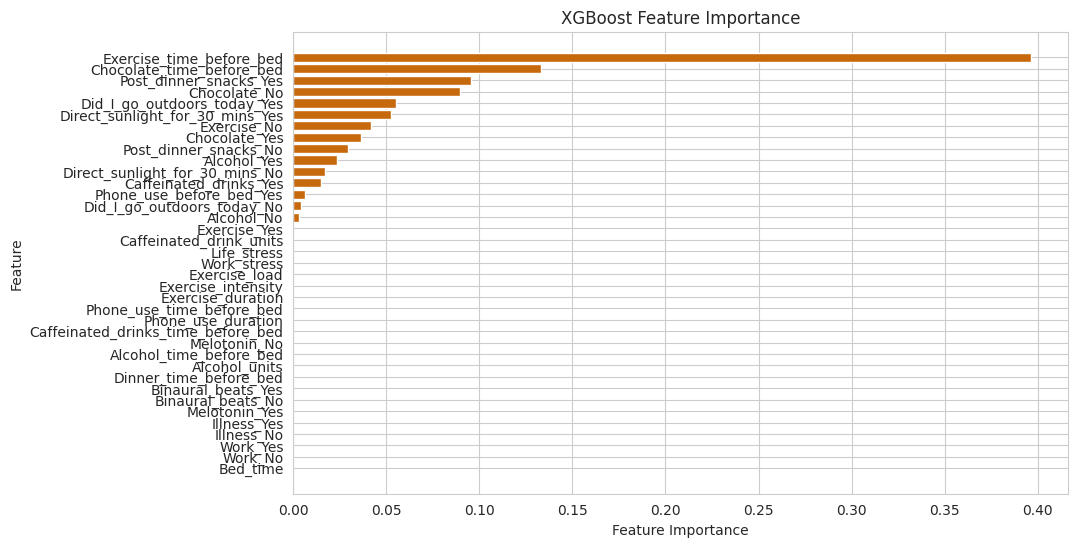

In [191]:
# Step 1: Get the transformers from the preprocessor
preprocessor = model.named_steps['preprocessor']

# Step 2: Extract numerical and categorical transformer information
# Access the StandardScaler (numerical features)
num_transformer = preprocessor.named_transformers_['num']
numeric_feature_names = numeric_features  # These are already available from the initial pipeline setup

# Access the OneHotEncoder (categorical features)
cat_transformer = preprocessor.named_transformers_['cat']
ohe_feature_names = cat_transformer.get_feature_names_out()

# Step 3: Combine both categorical and numerical feature names
all_feature_names = np.concatenate([ohe_feature_names, numeric_feature_names])

# Step 4: Extract feature importances from the XGBRegressor
xgb_model = model.named_steps['regressor']  # Access the XGBRegressor part of the pipeline
importance = xgb_model.feature_importances_

# Step 5: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

The plot above indicates the feature importance, measured by Gain (the default in XGBoost). Gain measures the improvement in accuracy or reduction in error brought by a feature when it's used to split the data. A higher gain means the feature is more important in reducing the model’s prediction error.
This is often the most intuitive and commonly used method to calculate feature importance, as it shows the total contribution of a feature to the model’s performance.

## Total_sleep_time

### Preprocess the Data

In [192]:
# Remove the following columns from df1a to create df_Total_sleep_time:
# Sleep_quality_transform, Sleep_onset_latency_transform,  Wakefulness_after_sleep_onset_transform.
# This leaves Total_sleep_time as the independent variable.
df_Total_sleep_time = df1a.drop(columns=['Sleep_quality_transform', 'Sleep_onset_latency_transform', 'Wakefulness_after_sleep_onset_transform'])
# View the updated DataFrame to ensure columns are dropped
df_Total_sleep_time.head()

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,...,Did_I_go_outdoors_today,Direct_sunlight_for_30_mins,Work,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Total_sleep_time
0,3.5,Yes,Yes,2,1.0,Yes,2,13.0,Yes,2.0,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,7.0
1,5.0,No,Yes,2,2.0,Yes,1,14.0,Yes,6.0,...,Yes,Yes,Yes,2,1,No,No,Yes,1410.0,6.5
2,6.0,Yes,Yes,4,1.5,Yes,1,15.0,No,NaN,...,No,No,No,0,2,No,No,Yes,1530.0,7.0
3,3.0,No,Yes,2,6.0,Yes,2,9.0,No,NaN,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,7.0
4,3.5,Yes,No,0,NaN,Yes,1,15.0,No,NaN,...,No,No,Yes,1,1,No,No,Yes,1410.0,7.0


### Define the dependent and independent variables

In [193]:
# Define dependent variables (X) and independent variable (y)
X = df_Total_sleep_time.drop(columns=['Total_sleep_time']) # Dependent variables
y = df_Total_sleep_time['Total_sleep_time'] # Independent variable

### Split the data

In [194]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a preprocessing pipeline

In [195]:
# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Create a pipeline with the preprocessor and XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=100))
    # NOTE: to use LGBMRegressor replace with:
    # ('regressor', LGBMRegressor(random_state=42, n_estimators=100))
])

### Train the model

In [196]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dinner_time_before_bed',
                                                   'Alcohol_units',
                                                   'Alcohol_time_before_bed',
                                                   'Caffeinated_drink_units',
                                                   'Caffeinated_drinks_time_before_bed',
                                                   'Chocolate_time_before_bed',
                                                   'Phone_use_duration',
                                                   'Phone_use_time_before_bed',
                                                   'Exercise_duration',
                                                   'Exercise_intensity',
                                                   'Exercise_loa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

### Make predictions and evaluate

In [197]:
# Make predictions
y_pred = model.predict(X_test)

# Generate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print report
print("XGBRegressor Performance Report:")
print(f"Mean Squared Error (MSE): {round(mse,3)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse,3)}")
print(f"Mean Absolute Error (MAE): {round(mae,3)}")
print(f"R-squared (R²): {round(r2,3)}")

XGBRegressor Performance Report:
Mean Squared Error (MSE): 0.93
Root Mean Squared Error (RMSE): 0.964
Mean Absolute Error (MAE): 0.849
R-squared (R²): -0.608


### Feature importance

                               Feature  Importance
10          Did_I_go_outdoors_today_No    0.427586
35                         Life_stress    0.216540
1               Post_dinner_snacks_Yes    0.146783
6                        Chocolate_Yes    0.087529
4               Caffeinated_drinks_Yes    0.060677
12      Direct_sunlight_for_30_mins_No    0.019013
13     Direct_sunlight_for_30_mins_Yes    0.017550
5                         Chocolate_No    0.009507
8                          Exercise_No    0.005763
0                Post_dinner_snacks_No    0.003618
2                           Alcohol_No    0.002348
11         Did_I_go_outdoors_today_Yes    0.001515
25             Caffeinated_drink_units    0.000723
3                          Alcohol_Yes    0.000523
7             Phone_use_before_bed_Yes    0.000320
9                         Exercise_Yes    0.000006
34                         Work_stress    0.000000
33            Exercise_time_before_bed    0.000000
32                       Exerci

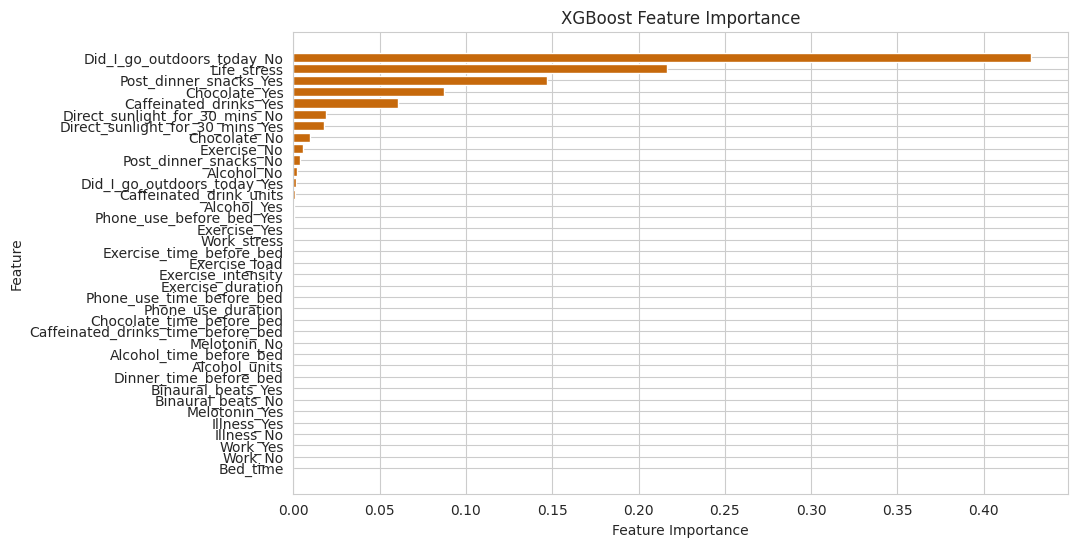

In [198]:
# Step 1: Get the transformers from the preprocessor
preprocessor = model.named_steps['preprocessor']

# Step 2: Extract numerical and categorical transformer information
# Access the StandardScaler (numerical features)
num_transformer = preprocessor.named_transformers_['num']
numeric_feature_names = numeric_features  # These are already available from the initial pipeline setup

# Access the OneHotEncoder (categorical features)
cat_transformer = preprocessor.named_transformers_['cat']
ohe_feature_names = cat_transformer.get_feature_names_out()

# Step 3: Combine both categorical and numerical feature names
all_feature_names = np.concatenate([ohe_feature_names, numeric_feature_names])

# Step 4: Extract feature importances from the XGBRegressor
xgb_model = model.named_steps['regressor']  # Access the XGBRegressor part of the pipeline
importance = xgb_model.feature_importances_

# Step 5: Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

# Optional: Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

## Wakefulness_after_sleep_onset_transform

### Preprocess the Data

In [199]:
# Remove the following columns from df1a to create df_Wakefulness_after_sleep_onset:
# Sleep_quality_transform, Sleep_onset_latency_transform, and Total_sleep_time.
# This leaves Wakefulness_after_sleep_onset_transform as the independent variable.
df_Wakefulness_after_sleep_onset = df1a.drop(columns=['Sleep_quality_transform', 'Sleep_onset_latency_transform', 'Total_sleep_time'])
# View the updated DataFrame to ensure columns are dropped
df_Wakefulness_after_sleep_onset.head()

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,...,Did_I_go_outdoors_today,Direct_sunlight_for_30_mins,Work,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Wakefulness_after_sleep_onset_transform
0,3.5,Yes,Yes,2,1.0,Yes,2,13.0,Yes,2.0,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,100.0
1,5.0,No,Yes,2,2.0,Yes,1,14.0,Yes,6.0,...,Yes,Yes,Yes,2,1,No,No,Yes,1410.0,25.0
2,6.0,Yes,Yes,4,1.5,Yes,1,15.0,No,NaN,...,No,No,No,0,2,No,No,Yes,1530.0,50.0
3,3.0,No,Yes,2,6.0,Yes,2,9.0,No,NaN,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,0.0
4,3.5,Yes,No,0,NaN,Yes,1,15.0,No,NaN,...,No,No,Yes,1,1,No,No,Yes,1410.0,0.0


### Define the dependent and independent variables


In [200]:
# Define dependent variables (X) and independent variable (y)
X = df_Wakefulness_after_sleep_onset.drop(columns=['Wakefulness_after_sleep_onset_transform']) # Dependent variables
y = df_Wakefulness_after_sleep_onset['Wakefulness_after_sleep_onset_transform'] # Independent variable

### Split the data

In [201]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a preprocessing pipeline

In [202]:
# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Create a pipeline with the preprocessor and XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=100))
    # NOTE: to use LGBMRegressor replace with:
    # ('regressor', LGBMRegressor(random_state=42, n_estimators=100))
])

### Train the model

In [203]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dinner_time_before_bed',
                                                   'Alcohol_units',
                                                   'Alcohol_time_before_bed',
                                                   'Caffeinated_drink_units',
                                                   'Caffeinated_drinks_time_before_bed',
                                                   'Chocolate_time_before_bed',
                                                   'Phone_use_duration',
                                                   'Phone_use_time_before_bed',
                                                   'Exercise_duration',
                                                   'Exercise_intensity',
                                                   'Exercise_loa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

### Make predictions and evaluate

In [204]:
# Make predictions
y_pred = model.predict(X_test)

# Generate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print report
print("XGBRegressor Performance Report:")
print(f"Mean Squared Error (MSE): {round(mse,3)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse,3)}")
print(f"Mean Absolute Error (MAE): {round(mae,3)}")
print(f"R-squared (R²): {round(r2,3)}")

XGBRegressor Performance Report:
Mean Squared Error (MSE): 1780.573
Root Mean Squared Error (RMSE): 42.197
Mean Absolute Error (MAE): 34.496
R-squared (R²): -0.332


## Sleep_quality_transform

### Preprocess the Data

In [205]:
# Remove the following columns from df1a to create df_Sleep_quality:
# Sleep_onset_latency_transform,  Wakefulness_after_sleep_onset_transform and Total_sleep_time.
# This leaves Sleep_quality_transform as the independent variable.
df_Sleep_quality = df1a.drop(columns=['Sleep_onset_latency_transform', 'Wakefulness_after_sleep_onset_transform', 'Total_sleep_time'])
# View the updated DataFrame to ensure columns are dropped
df_Sleep_quality.head()

,Dinner_time_before_bed,Post_dinner_snacks,Alcohol,Alcohol_units,Alcohol_time_before_bed,Caffeinated_drinks,Caffeinated_drink_units,Caffeinated_drinks_time_before_bed,Chocolate,Chocolate_time_before_bed,...,Did_I_go_outdoors_today,Direct_sunlight_for_30_mins,Work,Work_stress,Life_stress,Illness,Melotonin,Binaural_beats,Bed_time,Sleep_quality_transform
0,3.5,Yes,Yes,2,1.0,Yes,2,13.0,Yes,2.0,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,33.333333
1,5.0,No,Yes,2,2.0,Yes,1,14.0,Yes,6.0,...,Yes,Yes,Yes,2,1,No,No,Yes,1410.0,66.666667
2,6.0,Yes,Yes,4,1.5,Yes,1,15.0,No,NaN,...,No,No,No,0,2,No,No,Yes,1530.0,66.666667
3,3.0,No,Yes,2,6.0,Yes,2,9.0,No,NaN,...,Yes,Yes,No,0,1,No,No,Yes,1410.0,100.000000
4,3.5,Yes,No,0,NaN,Yes,1,15.0,No,NaN,...,No,No,Yes,1,1,No,No,Yes,1410.0,100.000000


### Define the dependent and independent variables

In [206]:
# Define dependent variables (X) and independent variable (y)
X = df_Sleep_quality.drop(columns=['Sleep_quality_transform']) # Dependent variables
y = df_Sleep_quality['Sleep_quality_transform'] # Independent variable

### Split the data

In [207]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a preprocessing pipeline

In [208]:
# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features) # One-hot encode categorical features
    ])

# Create a pipeline with the preprocessor and XGBoost
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_estimators=100))
    # NOTE: to use LGBMRegressor replace with:
    # ('regressor', LGBMRegressor(random_state=42, n_estimators=100))
])

### Train the model

In [209]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dinner_time_before_bed',
                                                   'Alcohol_units',
                                                   'Alcohol_time_before_bed',
                                                   'Caffeinated_drink_units',
                                                   'Caffeinated_drinks_time_before_bed',
                                                   'Chocolate_time_before_bed',
                                                   'Phone_use_duration',
                                                   'Phone_use_time_before_bed',
                                                   'Exercise_duration',
                                                   'Exercise_intensity',
                                                   'Exercise_loa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

### Make predictions and evaluate

In [210]:
# Make predictions
y_pred = model.predict(X_test)

# Generate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print report
print("XGBRegressor Performance Report:")
print(f"Mean Squared Error (MSE): {round(mse,3)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse,3)}")
print(f"Mean Absolute Error (MAE): {round(mae,3)}")
print(f"R-squared (R²): {round(r2,3)}")

XGBRegressor Performance Report:
Mean Squared Error (MSE): 2603.627
Root Mean Squared Error (RMSE): 51.026
Mean Absolute Error (MAE): 46.441
R-squared (R²): -2.515
